In [1]:
import pandas as pd
import seaborn as sns
from sklearn import tree
import numpy as np
import glob, os
import matplotlib.pyplot as plt


# PERCENTAGES is the percentages of the top score parameters

In [2]:
PERCENTAGES = 0.5
ASCEND = False

In [3]:
performance = "ap"

# Listing the paramters result files

In [4]:
files = glob.glob("saved/parameters/newplot/*GSE*"+str(performance)+"*.txt")

In [5]:
files

['saved/parameters/newplot\\bulk_fGSE110894_ap_score_ori.txt',
 'saved/parameters/newplot\\bulk_fGSE112274_ap_score_ori.txt',
 'saved/parameters/newplot\\bulk_fGSE117872_HN120_ap_score_ori.txt',
 'saved/parameters/newplot\\bulk_fGSE117872_HN137_ap_score_ori.txt',
 'saved/parameters/newplot\\bulk_fGSE140440_ap_score_ori.txt',
 'saved/parameters/newplot\\bulk_fGSE149383_ap_score_ori.txt']

In [6]:
gene = {"GSE110894":21182,"GSE112274":26982,"GSE117872":18120,"GSE140440":32197,"GSE149383":18380}
cell = {"GSE110894":1419,"GSE112274":507,"GSE117872":1302,"GSE140440":324,"GSE149383":2730}
drop = {"GSE110894":73.17,"GSE112274":71.27,"GSE117872":59.33,"GSE140440":64.22,"GSE149383":94.26}


In [7]:
def apply_sum(r,colname):
    nums = r[colname].split(",")
    return int(nums[0]) + int(nums[1])

def apply_sum_col(r,columns):
    s = 0
    for c in columns:
        s = int(r[c])+s
    return s

def apply_split_val(r,colname,sep="_bottle_",ind=1):
    return r[colname].split(",")[ind]

In [8]:
# files = [files[2]]
# f = files[0]

In [9]:
df_all = pd.DataFrame([])
# Read an process all files
for f in files:
    
    print(f)
    df_score = pd.read_csv(files[0],header=None,sep="\t")

    df_param = pd.read_csv(f,header=None,sep="_")

    if(f.find("117872")>0):
        df_param.loc[:,2] = df_param.loc[:,2]+df_param.loc[:,3]
        df_param = df_param.drop(columns=[3])

    col_names = df_param.loc[1,1::2].values
    df_param_vals = df_param.loc[:,0::2]

    df_v = df_param_vals.iloc[:,:-1]

    df_s = df_param_vals.iloc[:,-1].str.split("\t", expand = True)
    df_s

    df_concat = pd.concat([df_v, df_s], axis=1)

    col_names = ["bulk_data"]+list(col_names)+["score"]

    df_concat.columns = col_names
    
    df_concat["all_p"] = df_score.iloc[:,0]

    df_param_vals = df_concat.dropna()    
    # Order by score
    df_param_vals.sort_values("score",inplace=True,ascending=ASCEND)   
    

    # Append the df to the main file
    if(len(df_all)==0):
        df_all = df_param_vals.head(int(len(df_param_vals)*PERCENTAGES))
    else:
        df_all = pd.concat([df_all, df_param_vals.head(int(len(df_param_vals)*PERCENTAGES))])

saved/parameters/newplot\bulk_fGSE110894_ap_score_ori.txt
saved/parameters/newplot\bulk_fGSE112274_ap_score_ori.txt
saved/parameters/newplot\bulk_fGSE117872_HN120_ap_score_ori.txt


e:\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


saved/parameters/newplot\bulk_fGSE117872_HN137_ap_score_ori.txt
saved/parameters/newplot\bulk_fGSE140440_ap_score_ori.txt
saved/parameters/newplot\bulk_fGSE149383_ap_score_ori.txt


In [10]:
df_all

,bulk_data,data,drug,bottle,edim,pdim,model,dropout,gene,lr,mod,sam,transfer,score,all_p
3345,integrate,GSE110894,I.BET.762,128,"512,256","128,64",DAE,0.1,F,0.50,new,downsampling,before,0.9931382788693794,integrate_data_GSE110894_drug_I.BET.762_bottle...
937,integrate,GSE110894,I.BET.762,128,"512,256","128,64",DAE,0.1,F,0.10,new,downsampling,before,0.9931382788693794,integrate_data_GSE110894_drug_I.BET.762_bottle...
7942,integrate,GSE110894,I.BET.762,512,"512,256","256,128",DAE,0.1,F,0.01,new,no,after,0.991897685405627,integrate_data_GSE110894_drug_I.BET.762_bottle...
10416,old,GSE110894,I.BET.762,256,"512,256","256,128",AE,0.1,F,0.50,new,upsampling,after,0.9915601536496237,old_data_GSE110894_drug_I.BET.762_bottle_256_e...
9062,old,GSE110894,I.BET.762,256,"512,256","256,128",AE,0.1,F,0.01,new,upsampling,after,0.9915601536496237,old_data_GSE110894_drug_I.BET.762_bottle_256_e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,integrate,GSE149383,ERLOTINIB,128,"256,128","128,64",AE,0.3,F,0.01,old,downsampling,before,0.5972690035963586,new_data_GSE110894_drug_I.BET.762_bottle_128_e...
2709,old,GSE149383,ERLOTINIB,32,"256,128","128,64",DAE,0.3,F,0.01,new,SMOTE,before,0.5972201249783955,integrate_data_GSE110894_drug_I.BET.762_bottle...
3927,old,GSE149383,ERLOTINIB,32,"256,128","128,64",DAE,0.3,F,0.10,new,SMOTE,before,0.5972201249783955,new_data_GSE110894_drug_I.BET.762_bottle_32_ed...
1570,old,GSE149383,ERLOTINIB,64,"256,128","128,64",DAE,0.1,F,0.50,new,downsampling,after,0.5969854845044442,new_data_GSE110894_drug_I.BET.762_bottle_64_ed...


In [11]:
    # df_all = pd.DataFrame([])
# # Read an process all files
# for f in files:
    
#     print(f)
#     df_score = pd.read_csv(f,header=None,sep="\t")
#     df_score.columns=["Param","score"]
#     df_param = pd.read_csv(f,header=None,sep="_")
    
#     # If the file have an extra flag of HN120
#     if(f.find("117872")>0):
#         df_param.loc[:,2] = df_param.loc[:,2]+df_param.loc[:,3]
#         df_param = df_param.drop(columns=[3])

    
#     # Get column names as
#     col_names = df_param.loc[1,1::2].values
#     df_param_vals = df_param.loc[0,0::2]
    
#     #sams = [ r.split("\t")[0] for r in df_param_vals.iloc[:,-1].values]
    
#     sams = df_param_vals.iloc[:,-1].str.split("\t", n = 1, expand = True).iloc[:,0].values
#     df_param_vals.iloc[:,-1] = sams
#     df_param_vals.columns= list(col_names)
    
    
#     # Add other demos
        
# #     df_param_vals["p_parms"] = df_param_vals.apply(apply_sum,colname="edim",axis=1)
# #     df_param_vals["e_parms"] = df_param_vals.apply(apply_sum,colname="pdim",axis=1)
# #     df_param_vals["n_parms"] = df_param_vals.apply(apply_sum_col,columns=["e_parms","p_parms","bottle"],axis=1)

    
#     gse = f[31:40]
#     df_param_vals["genes"] = gene[gse]
#     df_param_vals["cells"] = cell[gse]
#     df_param_vals["pct_drop"] = drop[gse]
    
    
#     df_param_vals["all_p"] = df_param_vals["bottle"].astype(str)+df_param_vals["edim"]+df_param_vals["pdim"]+\
#     df_param_vals["dropout"].astype(str)+df_param_vals["lr"].astype(str)+\
#     df_param_vals["sam"]
    
#     df_param_vals["params"] = df_score.Param


    
#     df_param_vals["score"] =  df_score.score
    
#     # Order by score
#     df_param_vals.sort_values("score",inplace=True,ascending=ASCEND)   
    

#     # Append the df to the main file
#     if(len(df_all)==0):
#         df_all = df_param_vals.head(int(len(df_param_vals)*PERCENTAGES))
#     else:
#         df_all = pd.concat([df_all, df_param_vals.head(int(len(df_param_vals)*PERCENTAGES))])

In [12]:
df = df_all[["data","bulk_data","score"]]\
.groupby(["data"])\
.aggregate(['min','count'])\
.reset_index()
df

data  bulk_data                      score      
                         min count                  min count
0       GSE110894  integrate  5231   0.5560376908123024  5231
1       GSE112274  integrate  5231  0.07133276929853442  5231
2  GSE117872HN120  integrate  5224   0.5322046360169863  5224
3  GSE117872HN137  integrate  5215   0.6732969131187666  5215
4       GSE140440  integrate  5231   0.5131002335940954  5231
5       GSE149383  integrate  5231   0.5968189470861827  5231

In [13]:
df = df_all[["bottle","edim","pdim","lr","data","dropout","score"]]\
.groupby(["bottle","edim","pdim","lr","data","dropout"])\
.aggregate(['min','count'])\
.reset_index()
df

bottle     edim     pdim    lr            data dropout  \
                                                             
0       32  256,128   128,64  0.01       GSE110894     0.1   
1       32  256,128   128,64  0.01       GSE110894     0.3   
2       32  256,128   128,64  0.01       GSE112274     0.1   
3       32  256,128   128,64  0.01       GSE112274     0.3   
4       32  256,128   128,64  0.01  GSE117872HN120     0.1   
..     ...      ...      ...   ...             ...     ...   
715    512  512,256  256,128  0.50  GSE117872HN137     0.3   
716    512  512,256  256,128  0.50       GSE140440     0.1   
717    512  512,256  256,128  0.50       GSE140440     0.3   
718    512  512,256  256,128  0.50       GSE149383     0.1   
719    512  512,256  256,128  0.50       GSE149383     0.3   

                   score        
                     min count  
0     0.5609942692812094    43  
1     0.5676103180812557    48  
2    0.07247311654285747    37  
3    0.08041844290808926    43  
4     0.5429483267790229    54  
..                   ...   ...  
715    0.702631293118787    48  
716   0.5181109900751478    36  
717   0.5173219903460629    48  
718   0.6064113321064499    55  
719    0.611764321715623    55  

[720 rows x 8 columns]

In [14]:
# df = df_all[["all_p","data","score"]]\
# .groupby(["data"])\
# .aggregate(['max','count'])\
# .reset_index()
# df

In [15]:
df_all.sort_values("score",ascending=False).drop_duplicates("data")

,bulk_data,data,drug,bottle,edim,pdim,model,dropout,gene,lr,mod,sam,transfer,score,all_p
8833,integrate,GSE117872HN137,CISPLATIN,512,"256,128","256,128",AE,0.1,F,0.50,old,upsampling,before,0.9967329664722049,new_data_GSE110894_drug_I.BET.762_bottle_256_e...
3002,new,GSE112274,GEFITINIB,64,"512,256","128,64",DAE,0.1,F,0.01,new,SMOTE,after,0.9966327566854922,new_data_GSE110894_drug_I.BET.762_bottle_128_e...
456,integrate,GSE140440,DOCETAXEL,128,"256,128","128,64",AE,0.1,F,0.10,old,no,after,0.9956639273211447,old_data_GSE110894_drug_I.BET.762_bottle_128_e...
937,integrate,GSE110894,I.BET.762,128,"512,256","128,64",DAE,0.1,F,0.10,new,downsampling,before,0.9931382788693794,integrate_data_GSE110894_drug_I.BET.762_bottle...
599,old,GSE117872HN120,CISPLATIN,128,"256,128","256,128",AE,0.1,F,0.50,new,downsampling,before,0.987863631221689,new_data_GSE110894_drug_I.BET.762_bottle_256_e...
8872,integrate,GSE149383,ERLOTINIB,512,"256,128","128,64",DAE,0.1,F,0.50,old,upsampling,after,0.982084765498564,integrate_data_GSE110894_drug_I.BET.762_bottle...


In [16]:
df.dropout.mode()

0    0.1
1    0.3
dtype: float64

In [17]:
df.sort_values(by=('score', 'min'),ascending=False)

bottle     edim     pdim    lr            data dropout  \
                                                             
112     32  512,256  256,128  0.01  GSE117872HN120     0.1   
199     64  256,128  256,128  0.10  GSE117872HN137     0.3   
211     64  256,128  256,128  0.50  GSE117872HN137     0.3   
79      32  512,256   128,64  0.01  GSE117872HN137     0.3   
91      32  512,256   128,64  0.10  GSE117872HN137     0.3   
..     ...      ...      ...   ...             ...     ...   
435    256  256,128   128,64  0.01       GSE112274     0.3   
447    256  256,128   128,64  0.10       GSE112274     0.3   
62      32  256,128  256,128  0.50       GSE112274     0.1   
50      32  256,128  256,128  0.10       GSE112274     0.1   
38      32  256,128  256,128  0.01       GSE112274     0.1   

                   score        
                     min count  
112   0.7158700076573287     2  
199   0.7137284326588668    51  
211   0.7137284326588668    51  
79    0.7056682224535249     9  
91    0.7056682224535249     7  
..                   ...   ...  
435  0.07135952828579868    46  
447  0.07135952828579868    54  
62   0.07133276929853442    35  
50   0.07133276929853442    35  
38   0.07133276929853442    33  

[720 rows x 8 columns]

In [18]:
df_all.groupby("all_p")

In [19]:
# plt.hist(df_all.score)
# plt.show()

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set_theme(style="ticks")

In [21]:
df_all["score"] = pd.to_numeric(df_all["score"])

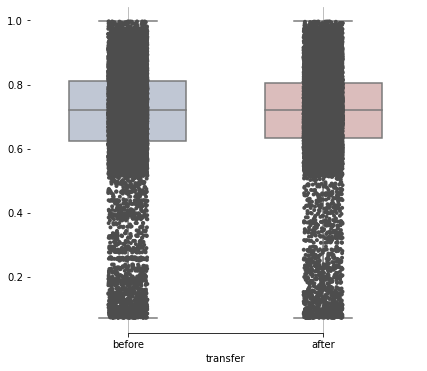

In [22]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
#ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="transfer", y="score", data=df_all,
            whis=[0, 100], width=.6, palette="vlag")

# # Add in points to show each observation
sns.stripplot(x="transfer", y="score", data=df_all,
              size=4, color=".3", linewidth=0)
  
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

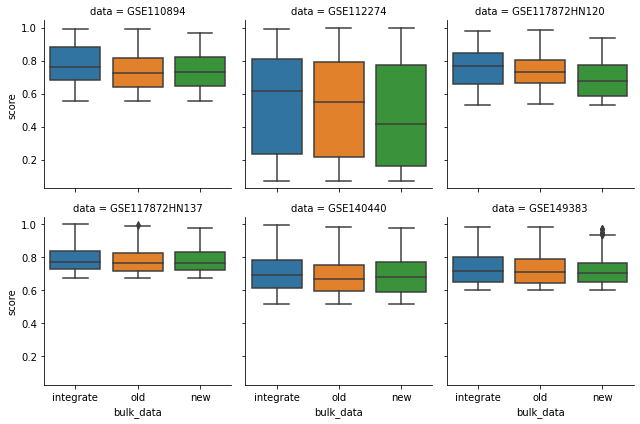

In [23]:
g = sns.catplot(x="bulk_data", y="score",
                #hue="1214data", 
                col="data",height=3, aspect=1,col_wrap=3, 
                data=df_all, kind="box");

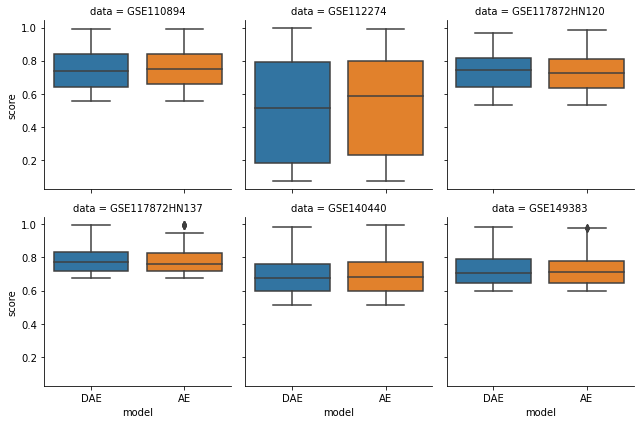

In [24]:
g = sns.catplot(x="model", y="score",
                #hue="1214data", 
                col="data",height=3, aspect=1,col_wrap=3, 
                data=df_all, kind="box");

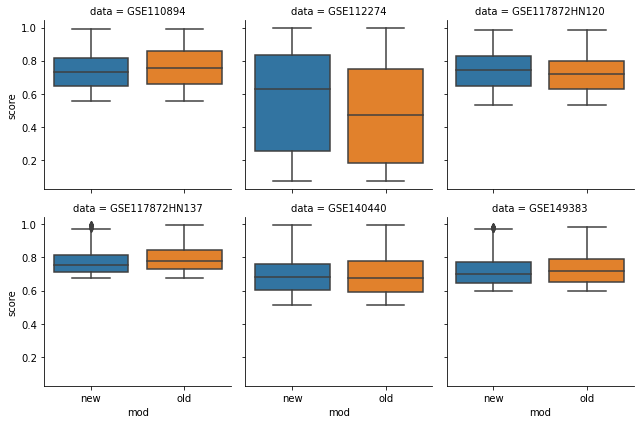

In [25]:
g = sns.catplot(x="mod", y="score",
                #hue="1214data", 
                col="data",height=3, aspect=1,col_wrap=3, 
                data=df_all, kind="box");

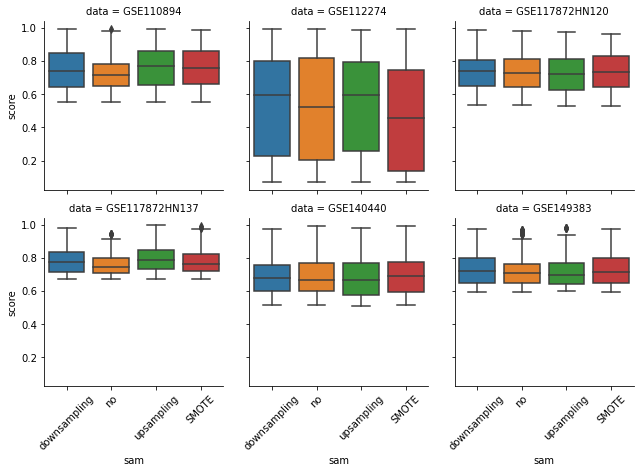

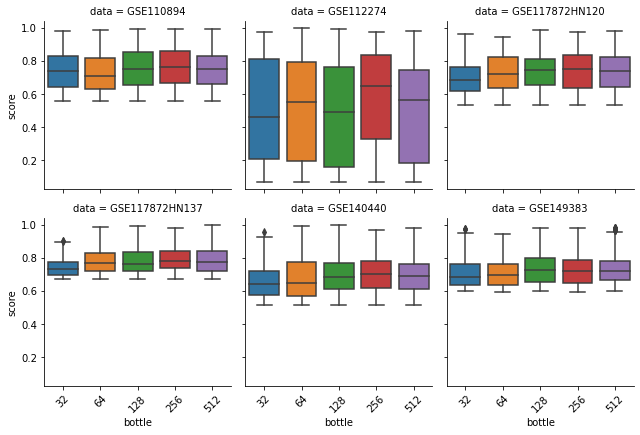

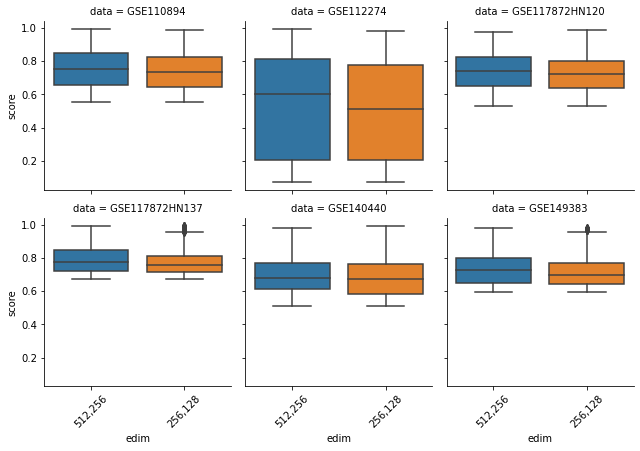

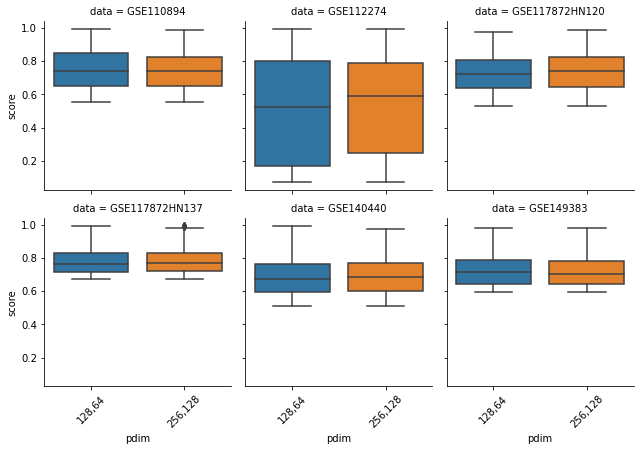

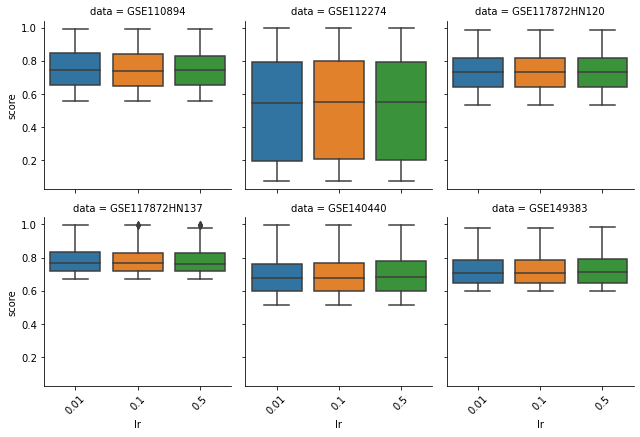

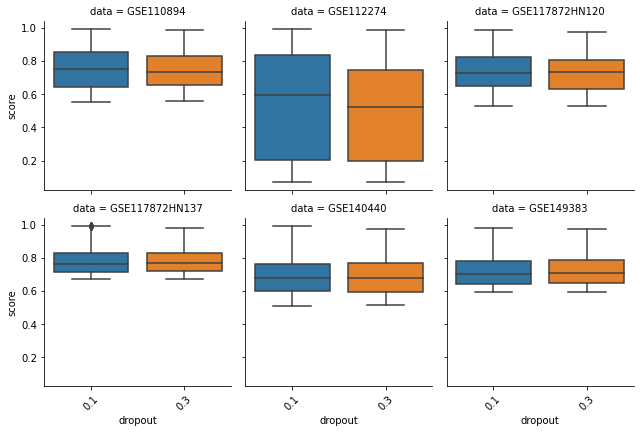

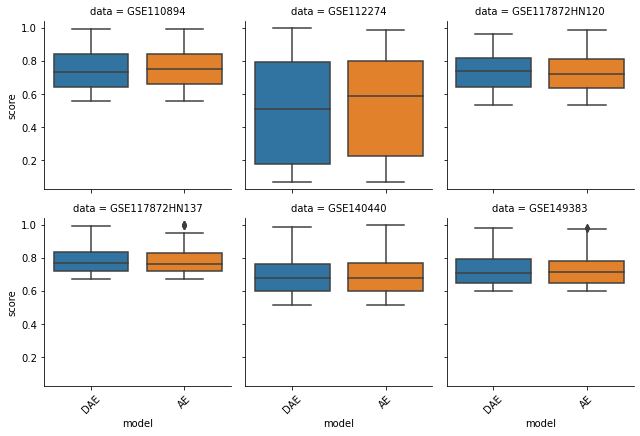

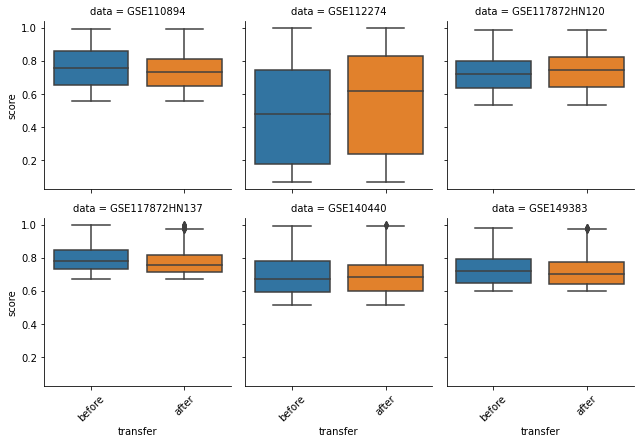

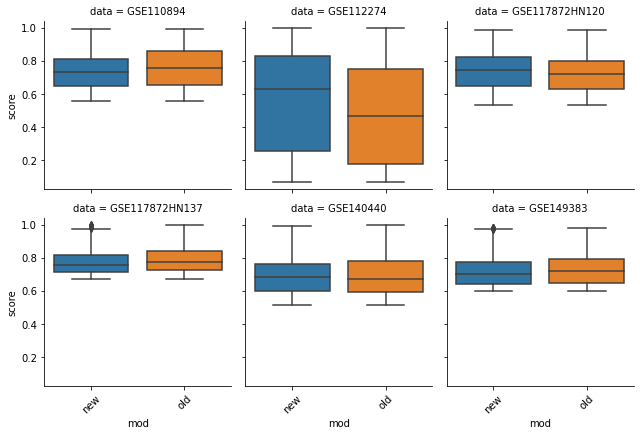

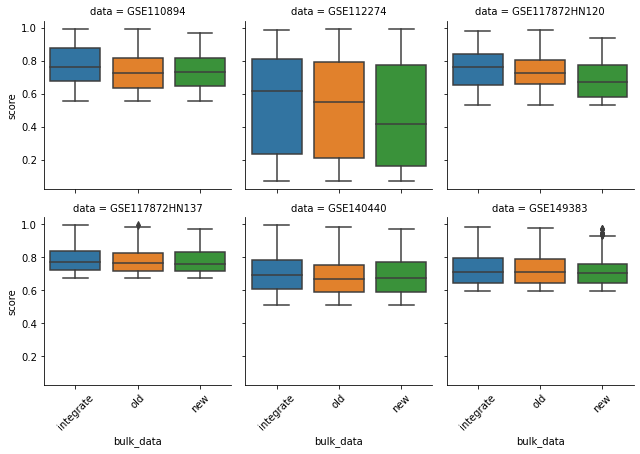

In [26]:
for p in ["sam","bottle","edim","pdim","lr","dropout","model","transfer","mod","bulk_data"]:
    g = sns.catplot(x=p, y="score",
                #hue="1214data", 
                col="data",height=3, aspect=1,col_wrap=3, 
                data=df_all, kind="box");
    
    g.set_xticklabels(rotation=45)

    plt.savefig("saved/figures/params/"+p+str(PERCENTAGES)+performance+"_parpm_box.tiff")

In [27]:
# df_score = df_score.sort_values("score",ascending=False)

In [28]:
df_score = df_all

In [29]:
df_all.columns

Index(['bulk_data', 'data', 'drug', 'bottle', 'edim', 'pdim', 'model',
       'dropout', 'gene', 'lr', 'mod', 'sam', 'transfer', 'score', 'all_p'],
      dtype='object')

In [30]:
select_params = ['bottle', 'dropout', 'lr', 'p_parms', 'e_parms', 'n_parms']

In [31]:
select_params

['bottle', 'dropout', 'lr', 'p_parms', 'e_parms', 'n_parms']

In [32]:
df_all

,bulk_data,data,drug,bottle,edim,pdim,model,dropout,gene,lr,mod,sam,transfer,score,all_p
3345,integrate,GSE110894,I.BET.762,128,"512,256","128,64",DAE,0.1,F,0.50,new,downsampling,before,0.993138,integrate_data_GSE110894_drug_I.BET.762_bottle...
937,integrate,GSE110894,I.BET.762,128,"512,256","128,64",DAE,0.1,F,0.10,new,downsampling,before,0.993138,integrate_data_GSE110894_drug_I.BET.762_bottle...
7942,integrate,GSE110894,I.BET.762,512,"512,256","256,128",DAE,0.1,F,0.01,new,no,after,0.991898,integrate_data_GSE110894_drug_I.BET.762_bottle...
10416,old,GSE110894,I.BET.762,256,"512,256","256,128",AE,0.1,F,0.50,new,upsampling,after,0.991560,old_data_GSE110894_drug_I.BET.762_bottle_256_e...
9062,old,GSE110894,I.BET.762,256,"512,256","256,128",AE,0.1,F,0.01,new,upsampling,after,0.991560,old_data_GSE110894_drug_I.BET.762_bottle_256_e...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,integrate,GSE149383,ERLOTINIB,128,"256,128","128,64",AE,0.3,F,0.01,old,downsampling,before,0.597269,new_data_GSE110894_drug_I.BET.762_bottle_128_e...
2709,old,GSE149383,ERLOTINIB,32,"256,128","128,64",DAE,0.3,F,0.01,new,SMOTE,before,0.597220,integrate_data_GSE110894_drug_I.BET.762_bottle...
3927,old,GSE149383,ERLOTINIB,32,"256,128","128,64",DAE,0.3,F,0.10,new,SMOTE,before,0.597220,new_data_GSE110894_drug_I.BET.762_bottle_32_ed...
1570,old,GSE149383,ERLOTINIB,64,"256,128","128,64",DAE,0.1,F,0.50,new,downsampling,after,0.596985,new_data_GSE110894_drug_I.BET.762_bottle_64_ed...


In [33]:
df_all.corr()

,bottle,dropout,lr,score
bottle,1.000000,-0.014427,-0.005808,0.041811
dropout,-0.014427,1.000000,-0.000133,-0.019783
lr,-0.005808,-0.000133,1.000000,-0.000587
score,0.041811,-0.019783,-0.000587,1.000000


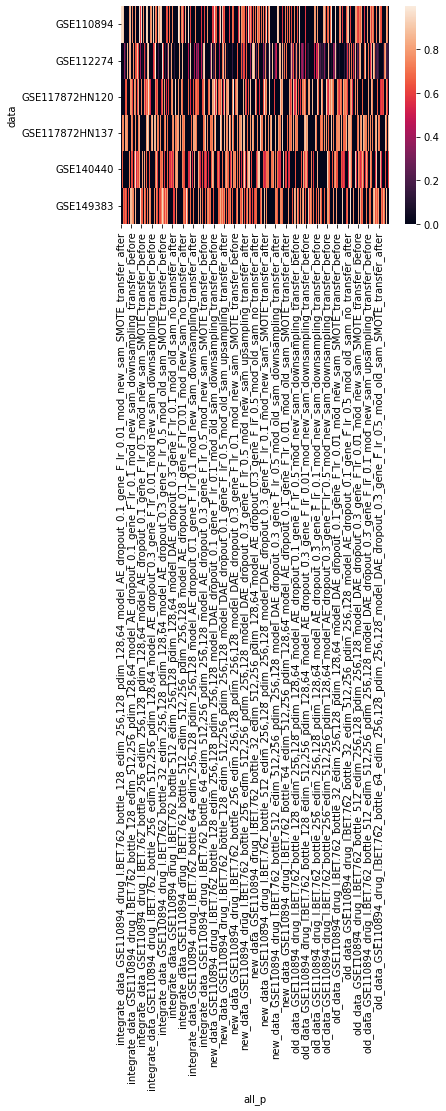

In [34]:
table = pd.pivot_table(df_all, values='score', index=["data"],
                    columns=["all_p"], aggfunc=np.max)

table=table.fillna(0)
ax = sns.heatmap(table)


In [35]:
for p1 in select_params:
    for p2 in select_params:
        if(p1!=p2):
            table = pd.pivot_table(df_score, values='score', index=[p1],
                                columns=[p2], aggfunc=np.max)
            
            table=table.fillna(0)
            ax = sns.heatmap(table)
            plt.savefig("saved/figures/param_ascend_"+str(ASCEND)+p1+p2+".pdf")
            plt.clf()

KeyError: 'p_parms'

<Figure size 432x288 with 0 Axes>

In [ ]:
set(df_score.iloc[:,0])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for data in set(df_score.iloc[:,0]):
    
    df_select = df_score.loc[df_score.iloc[:,0]==data,:]
    
    X = df_select.loc[:,select_params].values
    # y = 1 * x_0 + 2 * x_1 + 3
    y = df_select.loc[:,"score"].values

    reg = RandomForestRegressor().fit(X, y)
    print(data)
    print(reg.score(X, y))

    print(reg.feature_importances_)
print(df_select.loc[:,select_params].columns)

In [ ]:
reg.estimators_[0].predict(X[0].reshape(1,-1))

In [ ]:
text_representation  = tree.export_text(reg.estimators_[0])
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)